# Mchezopesa Ltd: Game Prediction Algorithm

> Overall Learning Outcome

* I can understand and apply supervised learning algorithms such as Regression, Decision trees, KNN, SVM, Naive Bayes, Random Forests while solving business problems.
* I can understand and apply approaches to assessing model performance and selection of the best model through overfitting, underfitting, bias-variance tradeoff, cross-validation, and hyperparameter tuning.
* I can analyze datasets using the principles of Exploratory Data Analysis through summary statistics, plotting features, correlation analysis, and feature importance.
* I can identify the regulations, standards, and ethics surrounding predictive modeling.

## 1. Defining the Question

### a) Specifying the Question


> A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

*Input: Home team, Away team, Tournament type (World cup, Friendly, Other)*



### b) Defining the Metric for Success

This project will be successful when: 

* 1)We accurately predict the winning team based on the two factors:

   a)Home team or away team

   b)The type of tournament 

* 2)The model achieves atleast 80% accuracy

* 3)Have the lowest RMSE score possible

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992.

How the rankings are calculated:

The rankings are calculated using an algorithm called Elo. The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual matches to/from a team’s existing point total. The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

### d) Recording the Experimental Design

> In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables. We will also create models using polynomial regression and logistic regression

Approach 1: Polynomial approach

What to train given:

* Rank of home team
* Rank of away team
* Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### e) Data Relevance

We will be using two datasets:

* FIFA rankings from 1993 to 2018 as fifa_rankings.csv
This one shows the FIFA ranking and points for the teams. It shows a monthly ranking of team performance

* International Soccer matches from 1872 to 2019 as results.csv
This one shows teams, scores, tournament type and country the game was played from

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while checking the rankings of the team.

> The datasets can be found [here](https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view)

>A more detailed explanation and history of the rankings is available [here](https://en.wikipedia.org/wiki/FIFA_World_Rankings)

>An explanation of the ranking procedure is available [here](https://www.fifa.com/fifa-world-ranking/procedure/men.html)

> Some features are available on the FIFA ranking page [here](https://www.fifa.com/fifa-world-ranking/ranking-table/men/index.html)

## 2. Reading the Data

In [168]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/Week 6 IP')

Mounted at /content/drive


In [3]:
# Loading the Dataset 
ranking = pd.read_csv('fifa_ranking.csv',parse_dates = ['rank_date'])
results = pd.read_csv('results.csv',parse_dates = ['date'])

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
print(ranking.shape)
print(results.shape)

(57793, 16)
(40839, 9)


In [5]:
# Previewing the top of our dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# Previewing the top of our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# Previewing the bottom of our dataset
ranking.tail() 

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# Previewing the bottom of our dataset
results.tail() 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [9]:
# Checking whether each column has an appropriate datatype
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [10]:
# Checking whether each column has an appropriate datatype
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


## 4. External Data Source Validation

> Checking our dataset validity by compering it with FIFA ranking page, the data is accurate.
* FIFA ranking [page](https://www.fifa.com/fifa-world-ranking/men?dateId=id13603)

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [11]:
# Checking for irrelevant columns
# ranking dataset
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [12]:
# Results dataste
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

> Apparently, all the columns looks useful. Will drop the unuseful ones after further analysis

### b. Completeness

In [13]:
# Checking for missing values
# Ranking dataset
ranking.isnull().any().any()

False

In [14]:
# Identifying the Missing Data
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [15]:
# Results dataset
results.isnull().any().any()

False

In [16]:
# Identifying the Missing Data
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

> We don't have any missing values

### c. Consistency

In [17]:
# Checking for duplicates
# Ranking dataset
ranking.duplicated().any().any()

True

In [18]:
# Dropping duplicates
ranking.drop_duplicates(inplace = True)
# Checking changes
ranking.duplicated().any().any()

False

In [19]:
# Results dataset
results.duplicated().any().any()

False

> The duplicate data in Ranking dataset have been dropped. The result dataset has no duplicates.

### d. Uniformity

In [20]:
# Checking column names
# Ranking dataset
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [21]:
# Results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

> The columns naming is uniform

### e. Outliers

In [22]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [23]:
# Checking for Outliers
# Ranking dataset
outliers(ranking)

Number of outliers = 21235
Percentage = 36.76674284922778%


In [24]:
# Checking for Outliers
# Results dataset
outliers(results)

Number of outliers = 5683
Percentage = 13.915619873160459%


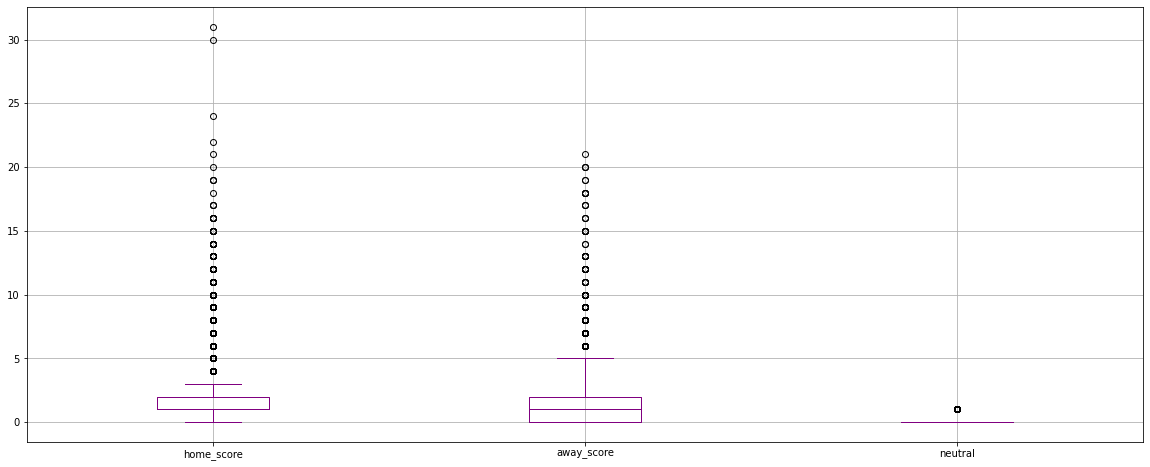

In [25]:
results.boxplot(figsize=(20,8),color='purple')

Though we have a great number of outliers in the scores data, these data are accurate. For example:
> On 11 April 2001, the Australian and American Samoa national soccer teams played each other in an Oceanian qualifying match for the 2002 FIFA World Cup. The match was played at the International Sports Stadium in Coffs Harbour, Australia. Australia set a world record for the largest victory in an international football match, winning the game 31–0. [Read More ...](https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoaps://)

### f. Anomalies

In [26]:
# Checking for Anomalies
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [27]:
# Checking for Anomalies
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


> We don't have any anomalies in our dataset

In [28]:
# dropping unnecessary columns
ranking_df = ranking[['rank','country_full','total_points']]
ranking_df.head()


,rank,country_full,total_points
0,1,Germany,0.0
1,2,Italy,0.0
2,3,Switzerland,0.0
3,4,Sweden,0.0
4,5,Argentina,0.0


### g. Merging the Datasets

> We will mrge the data based on the Home team/Away team and the ranking of the teams at the time (month/year) when the game was played. To do this:
* Create two additional columns for month and year
* Inner join the datasets on Home/Away team, Month and Date

In [29]:
# Create new columns
# Ranking Dataset
ranking['month'] = ranking['rank_date'].dt.month
ranking['year'] = ranking['rank_date'].dt.year

In [30]:
# Previewing the ranking dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [31]:
# Create new columns
# Results Dataset
results['month'] = results['date'].dt.month
results['year'] = results['date'].dt.year

In [32]:
# Previewing the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [33]:
# Merging the two datasets
# Merging while using Home Team as Primary Key
df_home = pd.merge(results,ranking,how = 'inner', left_on= ['date', 'home_team'], right_on= ['rank_date','country_full'])

In [34]:
# Previewing df_home
df_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_x,...,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month_y,year_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,8,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [35]:
# Understanding df_home
df_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 956
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     957 non-null    datetime64[ns]
 1   home_team                957 non-null    object        
 2   away_team                957 non-null    object        
 3   home_score               957 non-null    int64         
 4   away_score               957 non-null    int64         
 5   tournament               957 non-null    object        
 6   city                     957 non-null    object        
 7   country                  957 non-null    object        
 8   neutral                  957 non-null    bool          
 9   month_x                  957 non-null    int64         
 10  year_x                   957 non-null    int64         
 11  rank                     957 non-null    int64         
 12  country_full             957 non-nul

In [36]:
# Merging the two datasets
# Merging while using Away Team as Primary Key
df_away = pd.merge(results,ranking,how = 'inner', left_on= ['date', 'away_team'], right_on= ['rank_date','country_full'])

In [37]:
# Previewing df_away
df_away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_x,...,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month_y,year_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08,8,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,8,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [38]:
# Understanding df_home
df_away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 932
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     933 non-null    datetime64[ns]
 1   home_team                933 non-null    object        
 2   away_team                933 non-null    object        
 3   home_score               933 non-null    int64         
 4   away_score               933 non-null    int64         
 5   tournament               933 non-null    object        
 6   city                     933 non-null    object        
 7   country                  933 non-null    object        
 8   neutral                  933 non-null    bool          
 9   month_x                  933 non-null    int64         
 10  year_x                   933 non-null    int64         
 11  rank                     933 non-null    int64         
 12  country_full             933 non-nul

In [39]:
# Merging the two datasets
df_merged = pd.merge(df_home,df_away,how = 'inner', left_on= ['date', 'away_team','home_team'], right_on= ['date', 'away_team','home_team'])

In [40]:
# Previewing the merged dataset
df_merged.head()

,date,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,month_x_x,...,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y,month_y_y,year_y_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08,8,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,8,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,...,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [41]:
# Understanding the data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       871 non-null    datetime64[ns]
 1   home_team                  871 non-null    object        
 2   away_team                  871 non-null    object        
 3   home_score_x               871 non-null    int64         
 4   away_score_x               871 non-null    int64         
 5   tournament_x               871 non-null    object        
 6   city_x                     871 non-null    object        
 7   country_x                  871 non-null    object        
 8   neutral_x                  871 non-null    bool          
 9   month_x_x                  871 non-null    int64         
 10  year_x_x                   871 non-null    int64         
 11  rank_x                     871 non-null    int64         
 12  country_

In [42]:
# Dropping unnecessary columns
df_merged = df_merged[['date','home_team','away_team','home_score_x','away_score_x','tournament_x','rank_x','total_points_x','rank_y','total_points_y','year_x_x','month_y_y']]

In [43]:
# Understanding the dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 870
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            871 non-null    datetime64[ns]
 1   home_team       871 non-null    object        
 2   away_team       871 non-null    object        
 3   home_score_x    871 non-null    int64         
 4   away_score_x    871 non-null    int64         
 5   tournament_x    871 non-null    object        
 6   rank_x          871 non-null    int64         
 7   total_points_x  871 non-null    float64       
 8   rank_y          871 non-null    int64         
 9   total_points_y  871 non-null    float64       
 10  year_x_x        871 non-null    int64         
 11  month_y_y       871 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 88.5+ KB


In [44]:
 # Renaming the columns
df_merged.rename(columns = {'home_score_x':'home_score',
                                  'away_score_x':'away_score', 
                                  'tournament_x':'tournament',
                                  'rank_x':'home_team_rank',
                                  'total_points_x':'home_team_total_points',
                                  'rank_y':'away_team_rank',
                                  'total_points_y':'away_team_total_points',
                                  'year_x_x': 'year',
                                  'month_y_y' : 'month'                            
                                  }, inplace = True)

In [45]:
# Previewing the dataset
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,0.0,22,0.0,1993,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,0.0,14,0.0,1993,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,0.0,94,0.0,1993,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,0.0,86,0.0,1993,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,0.0,5,0.0,1993,8


## 6. Exploratory Descriptive Analysis

#### a) Univariate Analysis

Categorical

In [46]:
# Home team
df_merged.home_team.value_counts()

Mexico          23
Estonia         15
Saudi Arabia    15
Portugal        15
Greece          14
                ..
Haiti            1
Canada           1
Indonesia        1
Palestine        1
Grenada          1
Name: home_team, Length: 160, dtype: int64

Text(0.5, 0, 'Number of Teams')

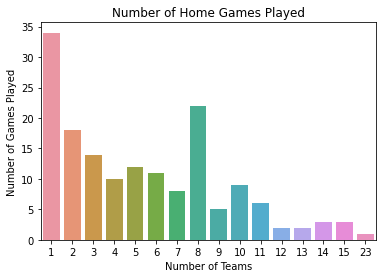

In [47]:
sb.countplot(df_merged.home_team.value_counts())
plt.title("Number of Home Games Played")
plt.ylabel("Number of Games Played")
plt.xlabel("Number of Teams")

> Mexico has the highest number of home matches while majority of the teams have played 1 game at home.

In [48]:
# Away Team
df_merged.away_team.value_counts()

Uruguay                     15
Argentina                   15
Kuwait                      14
Israel                      13
Bulgaria                    13
                            ..
Eritrea                      1
Tajikistan                   1
Turks and Caicos Islands     1
Sierra Leone                 1
Mongolia                     1
Name: away_team, Length: 159, dtype: int64

Text(0.5, 0, 'Number of Teams')

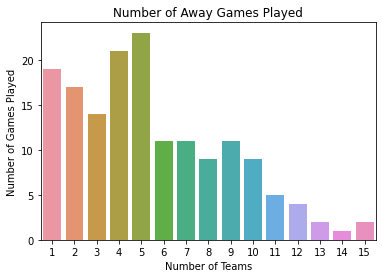

In [49]:
sb.countplot(df_merged.away_team.value_counts())
plt.title("Number of Away Games Played")
plt.ylabel("Number of Games Played")
plt.xlabel("Number of Teams")

> Uruguay has the highest away Matches while a majority of teams have played 5 matches away

In [50]:
# Tournament
df_merged.tournament.value_counts()

Friendly                                      574
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
Gulf Cup                                        7
AFF Championship                                7
CECAFA Cup                                      6
Copa América                                    6
African Cup of Nations qualification            5
Gold Cup                                        5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
African Nations Championship                    3
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3
King's Cup                                      3
CFU Caribbean Cup                               2
Merdeka Tournament                              2


> The majority of the matches are friendly matches

In [51]:
# Label Encoding the Tournament column
replace = ['AFC Asian Cup qualification','Cyprus International Tournament','Gulf Cup','AFF Championship','CECAFA Cup','Copa América','African Cup of Nations qualification',
           'Gold Cup','African Cup of Nations','AFC Asian Cup','SAFF Cup','African Nations Championship','Malta International Tournament'
           'United Arab Emirates Friendship Tournament',"King's Cup",'CFU Caribbean Cup','Merdeka Tournament','Oceania Nations Cup','UNCAF Cup'
           "Prime Minister's Cup",'Confederations Cup','CFU Caribbean Cup qualification','EAFF Championship','Windward Islands Tournament',
           'Copa del Pacífico','South Pacific Games','AFC Challenge Cup qualification','Nehru Cup','COSAFA Cup','Gold Cup qualification','Korea Cup',
           'UAFA Cup','Millennium Cup','USA Cup','Intercontinental Cup','UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Malta International Tournament', "Prime Minister's Cup"]
df_merged = df_merged.replace(replace,'Other')
df_merged = df_merged.replace('FIFA World Cup qualification','World Cup')
        

Text(0.5, 0, 'Tournament')

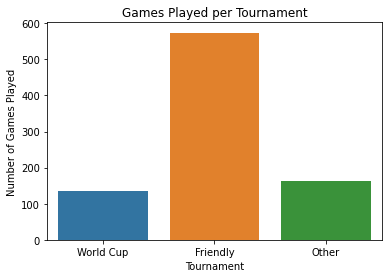

In [52]:
df_merged.tournament.unique()
sb.countplot(df_merged.tournament)
plt.title("Games Played per Tournament")
plt.ylabel("Number of Games Played")
plt.xlabel("Tournament")

> Majority of the matches are "Friendly" matches

Text(0.5, 0, 'Month of the Year')

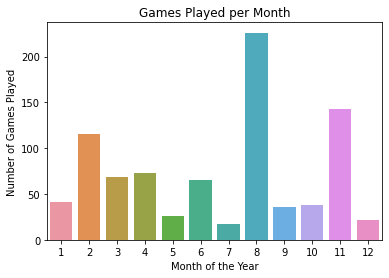

In [53]:
df_merged.month.unique()
sb.countplot(df_merged.month)
plt.title("Games Played per Month")
plt.ylabel("Number of Games Played")
plt.xlabel("Month of the Year")

> Majority of the matches are played in August. This period the major nations leagues are on holiday e.g premier league, laliga, etc

Numerical Analysis

In [54]:
# Describing the Data
df_merged.describe()

,home_score,away_score,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,38.543123,69.918485,30.606923,2004.789897,6.610792
std,1.905960,1.154691,47.557993,160.974942,50.497652,134.737527,5.405888,3.338913
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1993.000000,1.000000
25%,0.000000,0.000000,27.000000,0.000000,28.000000,0.000000,2000.000000,3.000000
50%,1.000000,1.000000,58.000000,0.000000,61.000000,0.000000,2005.000000,8.000000
75%,2.000000,2.000000,95.000000,0.000000,102.500000,0.000000,2010.000000,9.000000
max,31.000000,9.000000,206.000000,1273.690000,209.000000,1181.430000,2018.000000,12.000000


In [55]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [56]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [57]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [58]:
# Numerical columns
numerical = df_merged.select_dtypes(exclude = 'object').columns.tolist()
numerical.remove('date')
numerical

['home_score',
 'away_score',
 'home_team_rank',
 'home_team_total_points',
 'away_team_rank',
 'away_team_total_points',
 'year',
 'month']

In [59]:
# Mean
MeasureCentral('mean', numerical, df_merged)

home_score column mean = 1.632606199770379
away_score column mean = 1.0045924225028702
home_team_rank column mean = 65.54994259471871
home_team_total_points column mean = 38.54312284730194
away_team_rank column mean = 69.91848450057405
away_team_total_points column mean = 30.606923076923067
year column mean = 2004.7898966704936
month column mean = 6.610792192881745


In [60]:
# Median
MeasureCentral('median', numerical, df_merged)

home_score column median = 1.0
away_score column median = 1.0
home_team_rank column median = 58.0
home_team_total_points column median = 0.0
away_team_rank column median = 61.0
away_team_total_points column median = 0.0
year column median = 2005.0
month column median = 8.0


In [61]:
# Mode
MeasureCentral('mode', numerical, df_merged)

home_score column mode = 0    1
dtype: int64
away_score column mode = 0    0
dtype: int64
home_team_rank column mode = 0    33
dtype: int64
home_team_total_points column mode = 0    0.0
dtype: float64
away_team_rank column mode = 0    20
1    30
2    36
dtype: int64
away_team_total_points column mode = 0    0.0
dtype: float64
year column mode = 0    2010
dtype: int64
month column mode = 0    8
dtype: int64


In [62]:
# Range
MeasureDistribution('range', numerical, df_merged)

home_score column range = 31
away_score column range = 9
home_team_rank column range = 205
home_team_total_points column range = 1273.69
away_team_rank column range = 208
away_team_total_points column range = 1181.43
year column range = 25
month column range = 11


In [63]:
# IQR
MeasureDistribution('IQR', numerical, df_merged)

home_score column IQR = 2.0
away_score column IQR = 2.0
home_team_rank column IQR = 68.0
home_team_total_points column IQR = 0.0
away_team_rank column IQR = 74.5
away_team_total_points column IQR = 0.0
year column IQR = 10.0
month column IQR = 6.0


In [64]:
# Variance
MeasureDistribution('var', numerical, df_merged)

home_score column variance = 3.632682740145451
away_score column variance = 1.3333122187471238
home_team_rank column variance = 2261.7627327553205
home_team_total_points column variance = 25912.93209184582
away_team_rank column variance = 2550.0128878155638
away_team_total_points column variance = 18154.201124314754
year column variance = 29.223621943333665
month column variance = 11.148343164812566


In [65]:
# Standard Deviation
MeasureDistribution('std', numerical, df_merged)

home_score column std = 1.9059597949971168
away_score column std = 1.1546913954590308
home_team_rank column std = 47.55799336342231
home_team_total_points column std = 160.97494243467156
away_team_rank column std = 50.497652300038304
away_team_total_points column std = 134.73752678565373
year column std = 5.405887710943843
month column std = 3.3389134706985995


In [66]:
# Skew
MeasureDistribution('skew', numerical, df_merged)

home_score column skew = 5.524378027487252
away_score column skew = 1.74656856137909
home_team_rank column skew = 0.7530868154235779
home_team_total_points column skew = 5.036747706537314
away_team_rank column skew = 0.6669445275319614
away_team_total_points column skew = 5.504227894172978
year column skew = 0.08452350368144942
month column skew = -0.15700421947974902


In [67]:
# Kurtosis
MeasureDistribution('kurt', numerical, df_merged)

home_score column kurt = 68.55786471188763
away_score column kurt = 5.240328362114057
home_team_rank column kurt = -0.1488295399350119
home_team_total_points column kurt = 27.22683876271758
away_team_rank column kurt = -0.36177849504210124
away_team_total_points column kurt = 32.93975859882191
year column kurt = -0.705798983058942
month column kurt = -1.2729457366656054


In [68]:
# Outliers
outliers(df_merged)

Number of outliers = 100
Percentage = 11.481056257175661%


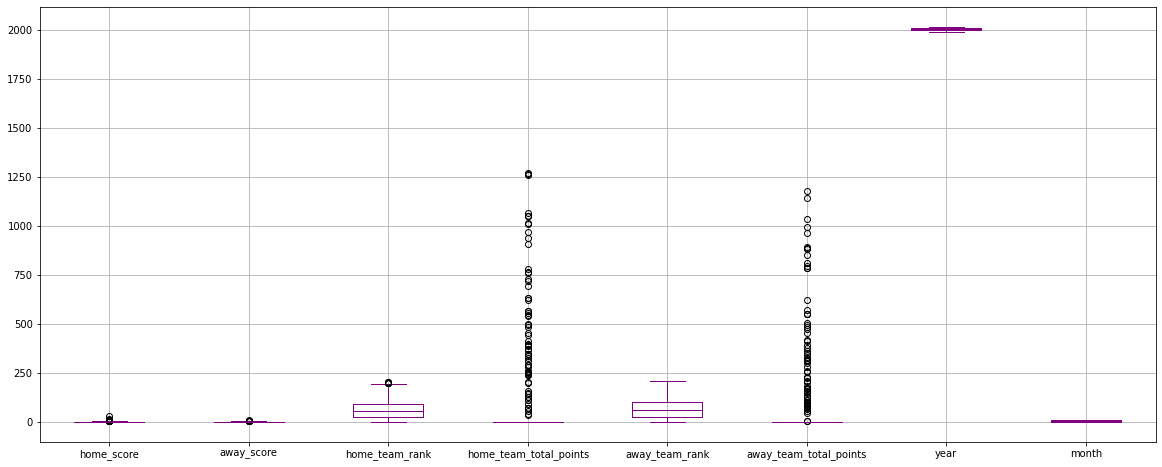

In [69]:
# Boxplots
df_merged.boxplot(figsize=(20,8),color='purple')

> Since the percentage of the outliers is big, removing them might greatly affect our model. Will check if the outliers are accurate data or are unintentional errors.
> Majority of the outliers are in the 'home team total points' and 'away team total points' columns

#### b) Bivariate Analysis

> Checking correlations

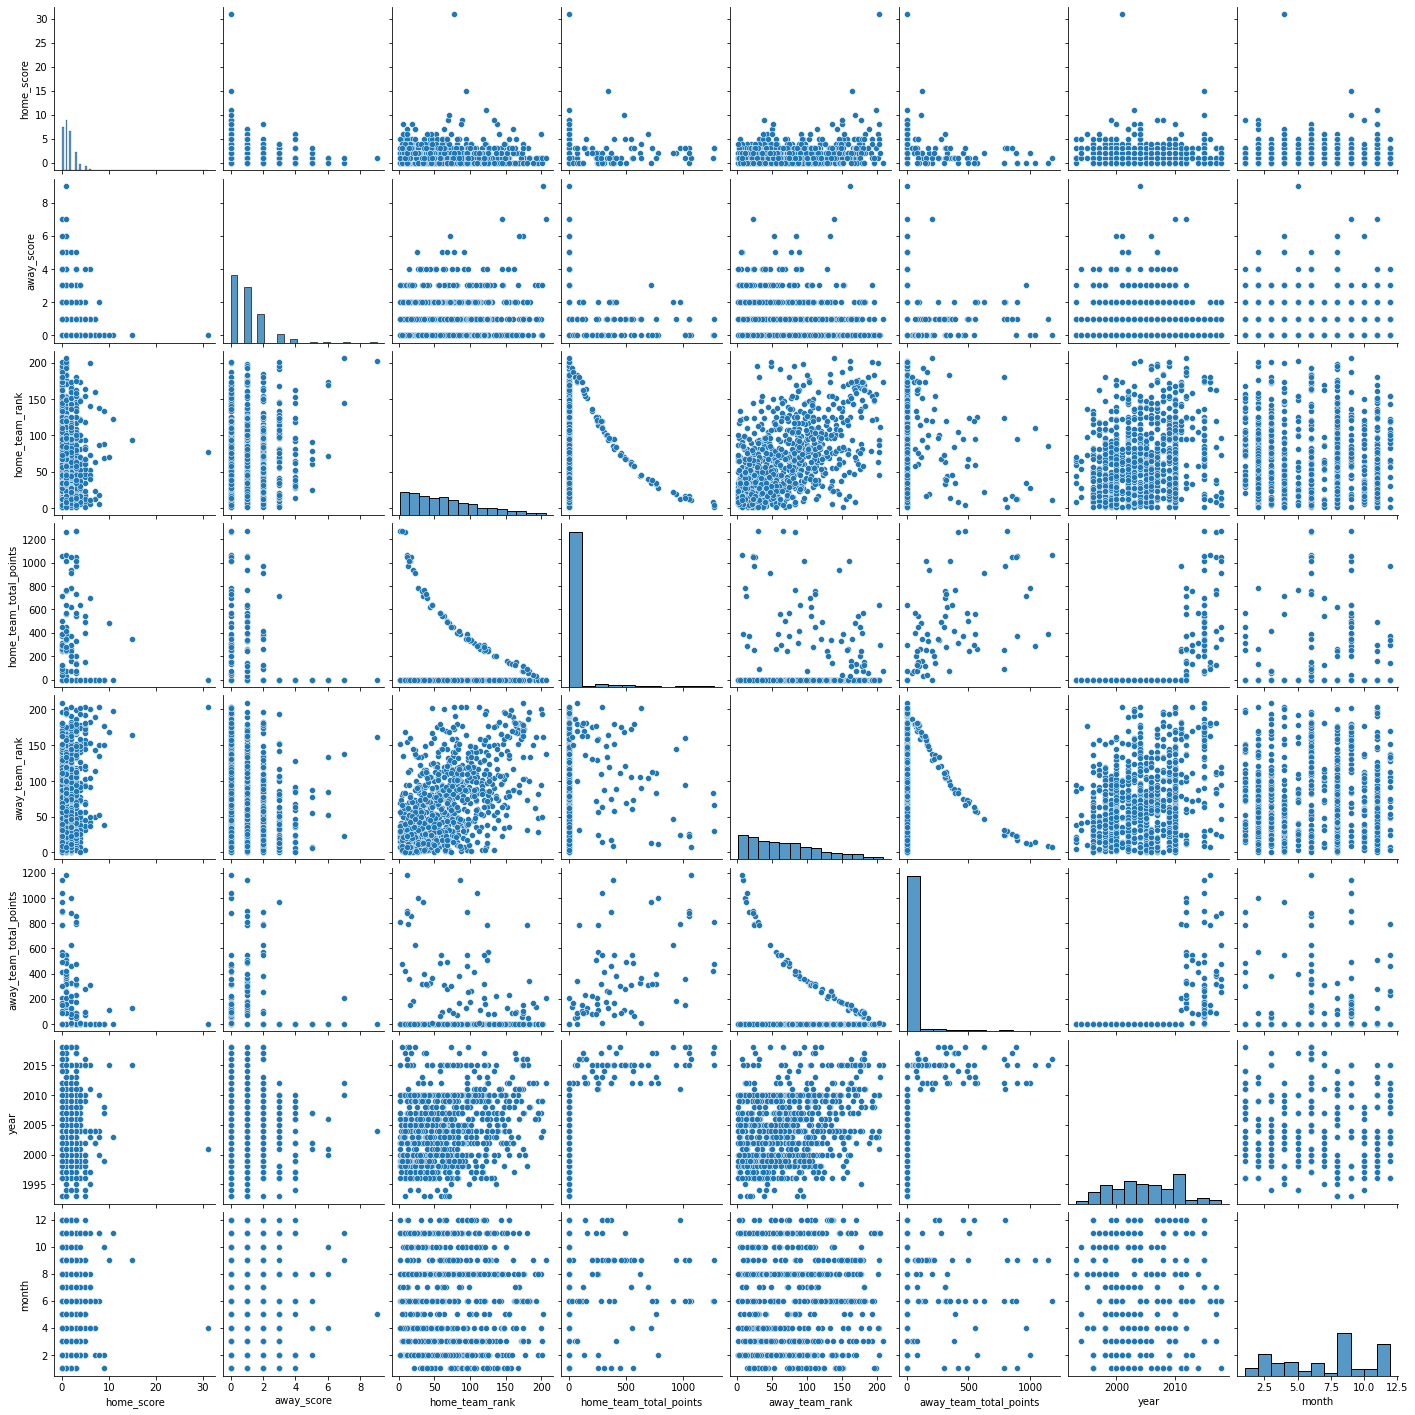

In [70]:
# explore these types of relationships across the entire data set.
sb.pairplot(df_merged)

> From the plots, there are no visible relationships among the features

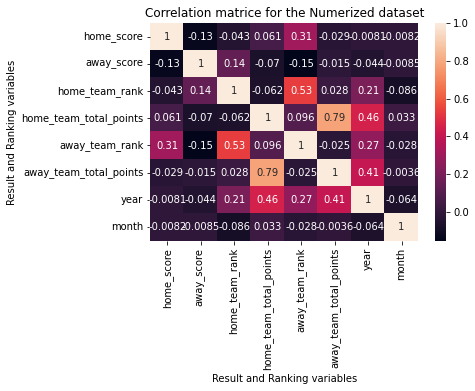

In [71]:
# Heatmap of correlation

corr_matrix = df_merged.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

We see a strong correlation between:
* away team total points vs home team total points
* away team rank vs home team rank

We see a weak correlation between:
* year vs away team total points
* home score vs away team rank
* year vs home team rank

In [72]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

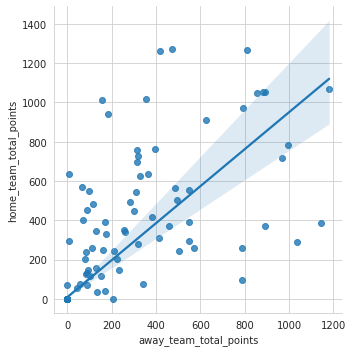

In [73]:
sb.set_style('whitegrid')
sb.lmplot(x='away_team_total_points',y='home_team_total_points',data=df_merged)

> A positive linear correlation

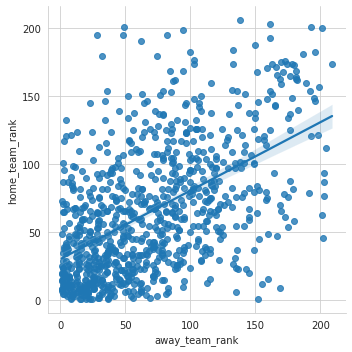

In [74]:
sb.set_style('whitegrid')
sb.lmplot(x='away_team_rank',y='home_team_rank',data=df_merged)

> A positive linear correlation

#### c) Multivariet Analysis

Feature Engineering

In [75]:
# Determining whether a game is a Win, Lose or Draw
df_merged['results'] = ''
# Score difference
difference = df_merged.home_score - df_merged.away_score
# Filling the status column (W = win, D = draw and L = loss) with resprect to the home team
df_merged.loc[(df_merged.home_score - df_merged.away_score > 0), 'results'] = 'W'
df_merged.loc[(df_merged.home_score - df_merged.away_score == 0), 'results'] = 'D'
df_merged.loc[(df_merged.home_score - df_merged.away_score < 0), 'results'] = 'L'
# Checking changes
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month,results
0,1993-08-08,Bolivia,Uruguay,3,1,World Cup,59,0.0,22,0.0,1993,8,W
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,0.0,14,0.0,1993,8,D
2,1993-08-08,Ecuador,Venezuela,5,0,World Cup,35,0.0,94,0.0,1993,8,W
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,0.0,86,0.0,1993,8,W
4,1993-08-08,Paraguay,Argentina,1,3,World Cup,67,0.0,5,0.0,1993,8,L


One-Hot Encoding

In [76]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing result column (label encoded values of results)
enc_df = pd.DataFrame(enc.fit_transform(df_merged[['results']]).toarray())
# merge with main df bridge_df on key values
df_merged = df_merged.join(enc_df)
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month,results,0,1,2
0,1993-08-08,Bolivia,Uruguay,3,1,World Cup,59,0.0,22,0.0,1993,8,W,0.0,0.0,1.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,0.0,14,0.0,1993,8,D,1.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,World Cup,35,0.0,94,0.0,1993,8,W,0.0,0.0,1.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,0.0,86,0.0,1993,8,W,0.0,0.0,1.0
4,1993-08-08,Paraguay,Argentina,1,3,World Cup,67,0.0,5,0.0,1993,8,L,0.0,1.0,0.0


In [77]:
# Dropping results column
df_merged = df_merged.drop(columns=['results'])

In [78]:
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month,0,1,2
0,1993-08-08,Bolivia,Uruguay,3,1,World Cup,59,0.0,22,0.0,1993,8,0.0,0.0,1.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,0.0,14,0.0,1993,8,1.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,World Cup,35,0.0,94,0.0,1993,8,0.0,0.0,1.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,0.0,86,0.0,1993,8,0.0,0.0,1.0
4,1993-08-08,Paraguay,Argentina,1,3,World Cup,67,0.0,5,0.0,1993,8,0.0,1.0,0.0


In [79]:
 # Renaming the columns
df_merged.rename(columns = {0:'Draw',
                                  1:'away_team_win', 
                                  2:'home_team_win',                           
                                  }, inplace = True)
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month,Draw,away_team_win,home_team_win
0,1993-08-08,Bolivia,Uruguay,3,1,World Cup,59,0.0,22,0.0,1993,8,0.0,0.0,1.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,0.0,14,0.0,1993,8,1.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,World Cup,35,0.0,94,0.0,1993,8,0.0,0.0,1.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,0.0,86,0.0,1993,8,0.0,0.0,1.0
4,1993-08-08,Paraguay,Argentina,1,3,World Cup,67,0.0,5,0.0,1993,8,0.0,1.0,0.0


Label Encoding

In [80]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_merged['tournament'] = labelencoder.fit_transform(df_merged['tournament'])
df_merged['home_team'] = labelencoder.fit_transform(df_merged['home_team'])
df_merged['away_team'] = labelencoder.fit_transform(df_merged['away_team'])
df_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_total_points,away_team_rank,away_team_total_points,year,month,Draw,away_team_win,home_team_win
0,1993-08-08,20,150,3,1,2,59,0.0,22,0.0,1993,8,0.0,0.0,1.0
1,1993-08-08,23,90,1,1,0,8,0.0,14,0.0,1993,8,1.0,0.0,0.0
2,1993-08-08,40,153,5,0,2,35,0.0,94,0.0,1993,8,0.0,0.0,1.0
3,1993-08-08,59,125,1,0,0,65,0.0,86,0.0,1993,8,0.0,0.0,1.0
4,1993-08-08,111,7,1,3,2,67,0.0,5,0.0,1993,8,0.0,1.0,0.0


Multicollinearity Check

In [81]:
# calculating VIF for each feature
# the independent variables set
data = df_merged[['home_score','away_score','tournament','home_team_rank','home_team_total_points','away_team_rank','away_team_total_points','year','month']] 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)
  


                  feature       VIF
0              home_score  2.085768
1              away_score  1.942292
2              tournament  1.622312
3          home_team_rank  5.104106
4  home_team_total_points  3.138651
5          away_team_rank  5.746786
6  away_team_total_points  3.047926
7                    year  9.318863
8                   month  5.001607


> Year has a high multicollinearity thus needs to be dropped

In [82]:
df_merged = df_merged.drop(columns=['year'])
df_merged = df_merged.drop(columns=['date'])

In [83]:
# calculating VIF for each feature
# the independent variables set
data = df_merged[['home_score','away_score','tournament','home_team_rank','home_team_total_points','away_team_rank','away_team_total_points','month']] 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

                  feature       VIF
0              home_score  1.963169
1              away_score  1.762082
2              tournament  1.621893
3          home_team_rank  4.788081
4  home_team_total_points  3.137745
5          away_team_rank  5.523088
6  away_team_total_points  3.034200
7                   month  2.639751


> All VIFs are lower than 5, except away_team_rank which is slightly above 5.Multicollinearity is not an issue now.

## 7. Implementing the Solution

### Logistic Regression

Predicting Home Team Scores

In [110]:
# Making a copy of data
data = df_merged.copy()

In [111]:
data.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_team_rank', 'home_team_total_points', 'away_team_rank',
       'away_team_total_points', 'month', 'Draw', 'away_team_win',
       'home_team_win'],
      dtype='object')

In [117]:
# Splitting our dataset
X = data[['home_team', 'away_team','away_score', 'tournament',
       'home_team_rank', 'home_team_total_points', 'away_team_rank',
       'away_team_total_points', 'month', 'Draw', 'away_team_win',
       'home_team_win']]
y = data["home_score"]

# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
# Set test_size=0.3 and random_state=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.19048641, 0.15331489, 0.14380209, 0.11900127, 0.08802837,
       0.08496615, 0.07718543, 0.06300239, 0.03548235, 0.02977228,
       0.01495838])

> After trials, we get the highest accuracy with PCA of 11

In [121]:
# Training/ Fitting  the data set
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [122]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array([2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1,
       2, 1, 3, 2, 2, 0, 0, 0, 1, 3, 5, 2, 0, 0, 2, 0, 2, 4, 2, 2, 0, 0,
       2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 3, 1, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0,
       2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 5, 1, 0, 1, 0, 1, 3, 0, 2, 0, 1, 3,
       1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 3, 0, 1, 3, 1,
       0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 3, 3, 3, 2, 0, 2, 2, 4, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0,
       1, 3, 2, 1, 1, 0, 0, 2, 2, 3, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0,
       2, 2, 0, 1, 1, 3, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0])

In [123]:
# comparing the test and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(10)

,Actual,Predicted
429,3,2
680,4,2
379,1,1
185,4,2
147,2,2
617,1,2
814,2,1
135,1,1
605,1,1
744,5,2


In [124]:
# describe
comparison_frame.describe()

,Actual,Predicted
count,262.000000,262.000000
mean,1.702290,1.202290
std,2.420204,1.025122
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,5.000000


In [125]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# The results from the confusion matrix tell us that 92 out of 30 are the number of correct predictions. 
# Accuracy score is 54%

[[64  5  0  0  0  0  0  0  0  0  0  0]
 [19 34 18  3  0  0  0  0  0  0  0  0]
 [ 0 21 39  5  1  0  0  0  0  0  0  0]
 [ 0  4 19  5  0  0  0  0  0  0  0  0]
 [ 0  3  8  1  0  0  0  0  0  0  0  0]
 [ 0  0  6  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]]
Accuracy 0.5419847328244275


In [153]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean = data["home_score"].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
x = 0.1*mean
if rmse >x:
  print("The model/algorithm is not Accurate")
else:
  print("The model/algorithm is Accurate")

Mean Absolute Error: 0.5916030534351145
Mean Squared Error: 1.0877862595419847
Root Mean Squared Error: 1.0429699226449365
The model/algorithm is not Accurate


Residual Plot

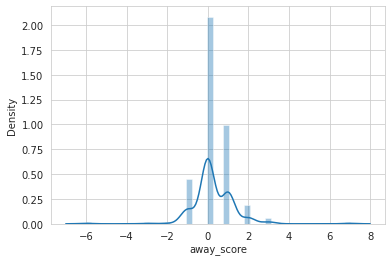

In [154]:
sb.distplot((y_test-y_pred),bins=50);

Cross Validation

In [165]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = data[['home_team', 'away_team','away_score', 'tournament',
       'home_team_rank', 'home_team_total_points', 'away_team_rank',
       'away_team_total_points', 'month', 'Draw', 'away_team_win',
       'home_team_win']]
y = data["home_score"]

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
  
  # fit a model accordingly
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(11)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  explained_variance = pca.explained_variance_ratio_
  explained_variance

  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 871 folds
trained 871 models


2.061324918335725

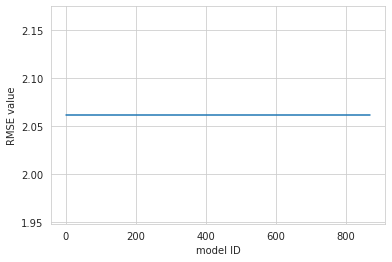

In [166]:
# Plotting CV
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

> The RMSE is equal all through

Heteroscedasticity

In [170]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 1.0598970419395837e-20
test_statistic = 87.04668200811277
Critical Value: inf
Variances are equal


Predicting Home Team Scores

In [143]:
# Splitting our dataset
X = data[['home_team', 'away_team','home_score', 'tournament',
       'home_team_rank', 'home_team_total_points', 'away_team_rank',
       'away_team_total_points', 'month', 'Draw', 'away_team_win',
       'home_team_win']]
y = data["away_score"]

# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
# Set test_size=0.3 and random_state=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [144]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20454038, 0.14874201, 0.13779004, 0.11285624, 0.08791352,
       0.08469386, 0.07719089, 0.06300584, 0.03739411, 0.03087429,
       0.01499881])

> After trials, we get the highest accuracy with PCA of 11

In [146]:
# Training/ Fitting  the data set
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [147]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 7, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 4, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 3,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2])

In [148]:
# comparing the test and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(10)

,Actual,Predicted
429,2,0
680,1,0
379,1,1
185,2,0
147,0,0
617,0,0
814,0,0
135,1,0
605,1,1
744,1,1


In [149]:
# describe
comparison_frame.describe()

,Actual,Predicted
count,262.000000,262.000000
mean,1.076336,0.805344
std,1.162098,0.928626
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,9.000000,7.000000


In [150]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# The results from the confusion matrix tell us that 92 out of 30 are the number of correct predictions. 
# Accuracy score is 39%

[[75 20  1  1  0  0  0  0]
 [41 34 10  0  0  0  1  0]
 [ 7 16 32  0  0  0  0  0]
 [ 0  5 11  1  1  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]]
Accuracy 0.5419847328244275


In [151]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean = data["away_score"].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
x = 0.1*mean
if rmse >x:
  print("The model/algorithm is not Accurate")
else:
  print("The model/algorithm is Accurate")

Mean Absolute Error: 0.5916030534351145
Mean Squared Error: 1.0877862595419847
Root Mean Squared Error: 1.0429699226449365
The model/algorithm is not Accurate


> With the logistic regression givin 35% and 39% accuracy in predicting Home Score and Away Score respectively, the model is not effective

### Polynomial Regression

Predicting Home Team Score

In [171]:
# Polynomial Regression function
def Polynomial(degrees, X_train, X_test, y_train, y_test):
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  return rmse_poly

In [177]:
# Degree of 1
X1 =  data.drop('home_score', axis = 1).values
y1 = data.home_score.values.reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
Polynomial(1, X1_train, X1_test, y1_train, y1_test)

0.9683892443850084

In [178]:
# Degree of 2
X1 =  data.drop('home_score', axis = 1).values
y1 = data.home_score.values.reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
Polynomial(2, X1_train, X1_test, y1_train, y1_test)

1.3210959399504068

In [179]:
# Degree of 3
X1 =  data.drop('home_score', axis = 1).values
y1 = data.home_score.values.reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
Polynomial(3, X1_train, X1_test, y1_train, y1_test)

800658981.0500809

> The optimal equation with the lowest RMSE is degree of 1, therefore the ideal equation is linear

In [193]:
# Using our model to make a prediction
polynomial = PolynomialFeatures(degree = 1)
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly =  polynomial.transform(X_test)
# Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
# Predictions
y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_poly


array([ 3.22225443e+00,  2.94403187e+00,  7.99164570e-01,  3.07659670e+00,
        2.35850115e+00,  2.25210779e+00,  2.18413899e+00,  1.20336814e+00,
        9.46279385e-01,  2.93158432e+00,  2.19345667e+00,  2.75854705e+00,
        2.39368400e-01,  2.02465161e+00,  1.87995087e+00,  3.14925705e+00,
        9.85130199e-01,  5.34260154e-01,  4.61070230e-01,  2.59677189e+00,
        3.82084036e-01,  1.33104925e+00,  2.50542039e+00,  8.25630941e-01,
        3.01633098e+00,  1.15135022e+00,  3.33774420e+00,  3.87062917e-01,
        5.22383740e-01,  1.75114336e-01,  1.89354285e+00,  3.11264721e+00,
        3.09321103e+00,  2.96101362e+00,  1.27538711e-01,  3.03952947e-01,
        2.46007115e+00,  3.28882145e-01,  2.09604673e+00,  3.25067809e+00,
        2.45441529e+00,  2.64689650e+00, -1.93115094e-01,  2.37723010e-01,
        2.48599735e+00,  2.53155258e+00,  2.04507099e+00,  7.48095816e-02,
        2.61865250e+00,  1.24781864e+00,  2.85761555e+00,  9.86934010e-01,
        1.88051145e-01,  

Predicting Away Team Score

In [187]:
# Degree of 1
X2 =  data.drop('away_score', axis = 1).values
y2 = data.away_score.values.reshape(-1, 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
Polynomial(1, X2_train, X2_test, y2_train, y2_test)

1.0262518126282365

In [188]:
# Degree of 2
X2 =  data.drop('away_score', axis = 1).values
y2 = data.away_score.values.reshape(-1, 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
Polynomial(2, X2_train, X2_test, y2_train, y2_test)

0.927499107020412

In [189]:
# Degree of 3
X2 =  data.drop('away_score', axis = 1).values
y2 = data.away_score.values.reshape(-1, 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
Polynomial(3, X2_train, X2_test, y2_train, y2_test)

2949172.1781707695

>The optimal equation with the lowest RMSE is degree of 2, therefore the ideal equation is quadratic

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> Yes, a more recent ranking data will be useful

### c). Did we have the right question?